In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in csv file and convert to dataframe
df = pd.read_csv('nfl_team_stats.csv')
df

,Team,Gms,Pts,Pts/G,RushYds,RYds/G,PassYds,PYds/G,TotYds,Yds/G,Season
0,Detroit,17,564,33.2,2488,146.4,4474,263.2,6962,409.5,2024
1,Buffalo,17,525,30.9,2230,131.2,3875,227.9,6105,359.1,2024
2,Baltimore,17,518,30.5,3189,187.6,4035,237.4,7224,424.9,2024
3,Tampa Bay,17,502,29.5,2536,149.2,4257,250.4,6793,399.6,2024
4,Washington,17,485,28.5,2619,154.1,3665,215.6,6284,369.6,2024
...,...,...,...,...,...,...,...,...,...,...,...
1269,Kansas City,16,243,15.2,2986,186.6,1834,114.6,4820,301.2,1978
1270,Tampa Bay,16,241,15.1,2098,131.1,1703,106.4,3801,237.6,1978
1271,Atlanta,16,240,15.0,1660,103.8,2402,150.1,4062,253.9,1978
1272,Baltimore,16,239,14.9,2044,127.8,2063,128.9,4107,256.7,1978


In [3]:
# Find total null values in each column
df.isnull().sum()

Team       0
Gms        0
Pts        0
Pts/G      0
RushYds    0
RYds/G     0
PassYds    0
PYds/G     0
TotYds     0
Yds/G      0
Season     0
dtype: int64

In [4]:
# Find columns that impact Points for each team
correlation = df.corr(numeric_only=True)
print(correlation['Pts/G'].sort_values(ascending=False))

Pts/G      1.000000
Pts        0.950606
Yds/G      0.832638
TotYds     0.728916
PYds/G     0.650748
PassYds    0.615421
RushYds    0.324418
RYds/G     0.321699
Season     0.230716
Gms        0.058875
Name: Pts/G, dtype: float64


Text(0.5, 1.0, 'Correlation')

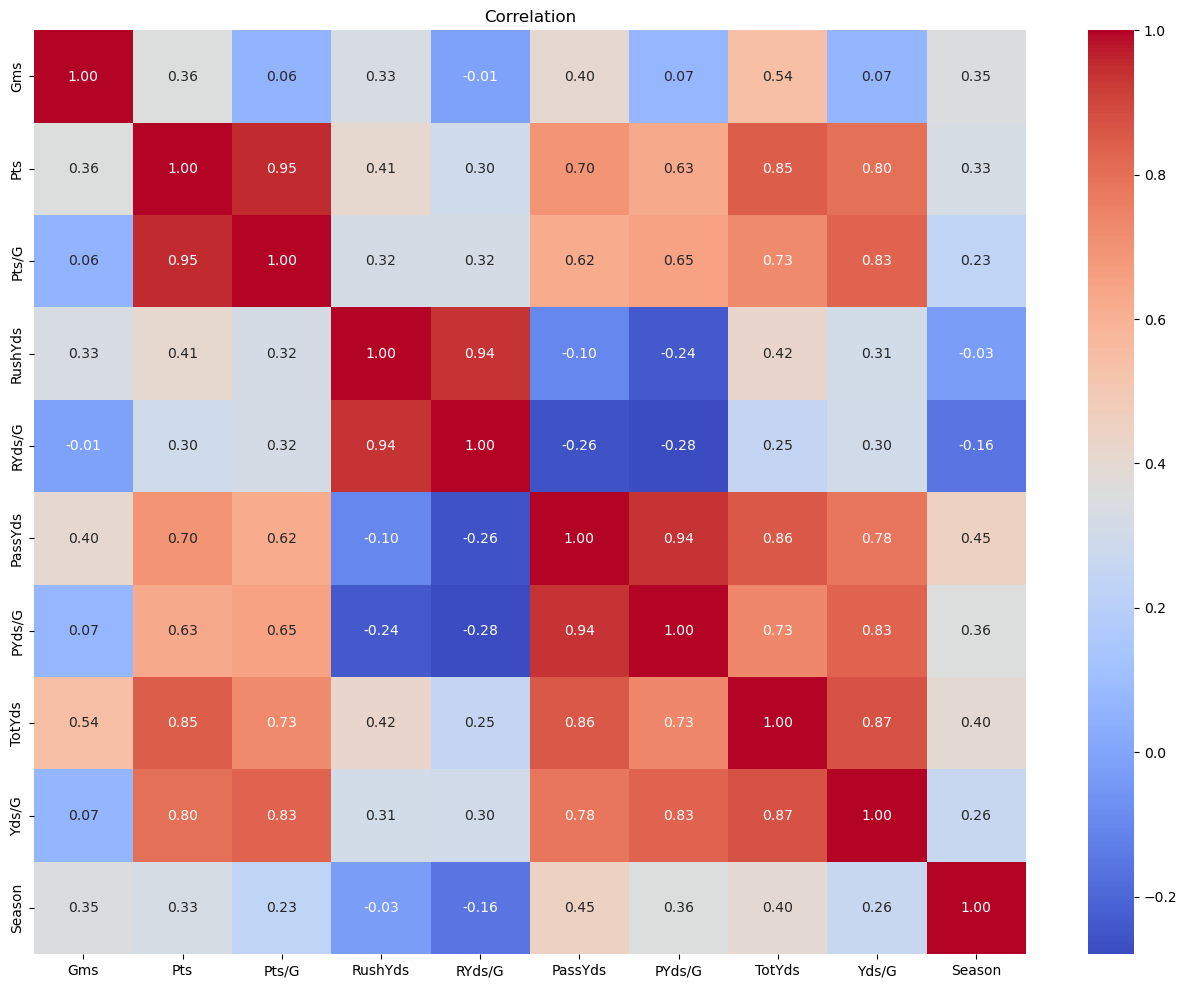

In [5]:
heatmap_columns = ['Team', 'Gms', 'Pts', 'Pts/G', 'RushYds', 'RYds/G', 'PassYds', 'PYds/G',
       'TotYds', 'Yds/G', 'Season']

# Create heatmap dataframe
heatmap_data = df[heatmap_columns]


#Create heatmap
plt.figure(figsize=(16,12))
sns.heatmap(heatmap_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation')

# Futre Scores Prediction Model

In [6]:
df.columns


Index(['Team', 'Gms', 'Pts', 'Pts/G', 'RushYds', 'RYds/G', 'PassYds', 'PYds/G',
       'TotYds', 'Yds/G', 'Season'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Hand pick the features
X = df[['Pts','RushYds', 'RYds/G', 'PassYds', 'PYds/G',]]
y = df["Pts/G"]

# Train/test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Build pipeline: scaling + regression
model = make_pipeline(StandardScaler(), LinearRegression())

# Train
model.fit(Xtrain, ytrain)
print(round(model.score(Xtest, ytest),2))

1.0


In [36]:
import pandas as pd

# Must match the same feature order used during training!
feature_names = ['Pts','RushYds', 'RYds/G', 'PassYds', 'PYds/G']

# Collect inputs
pts = float(input("Enter Pts: "))
rush_yds = float(input("Enter RushYds: "))
ryds_g   = float(input("Enter RYds/G: "))
pass_yds = float(input("Enter PassYds: "))
pyds_g   = float(input("Enter PYds/G: "))

# Build DataFrame with proper feature names
features_df = pd.DataFrame([{
    'Pts': pts,
    'RushYds': rush_yds,
    'RYds/G': ryds_g,
    'PassYds': pass_yds,
    'PYds/G': pyds_g
}])

# Predict
prediction = model.predict(features_df)

print("Predicted Points:", round(prediction[0], 1))


Predicted Points: 21.2
